In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import json
import pickle
from itertools import chain
import matplotlib.pyplot as plt

In [3]:
with open('data/full_dataset.p', 'rb') as f:
    data_df = pd.compat.pickle_compat.load(f)

In [4]:
data_df.head(30)

file_name   embed_code  video_title  \
20                  anim_play_requestplay_level2_01  nMbYAONAots           21   
21                                anim_play_idle_02  DDU9jeo3Y8c           22   
22   anim_reacttoface_unidentified_03_head_angle_40  D0MyBZXzlFg           23   
23  anim_reacttoface_unidentified_03_head_angle_-20  Z2uHBYREfkA           24   
24                      anim_reacttocliff_wheely_02  0Zc1B5s1_6Q           25   
25              anim_reacttocliff_turtlerollfail_03  WUAXLO7FZW0           26   
26              anim_reacttocliff_turtlerollfail_01  E5xh2nBIcn8           27   
27                  anim_reacttocliff_turtleroll_05  -i_o_BBMOAY           28   
28                  anim_reacttocliff_turtleroll_03  vPAddajZ_Xc           29   
29                  anim_reacttocliff_turtleroll_01  dHXdJoDUDGs           30   
30              anim_reacttocliff_stuckrightside_02  tCiz0acrjR8           31   
31               anim_reacttocliff_stuckleftside_03  EhKA_jkc41o           32   
32               anim_reacttocliff_stuckleftside_01  kPkh13DUWws           33   
33                      anim_reacttocliff_pickup_05  cJ4BbiTnTnk           34   
34                      anim_reacttocliff_pickup_03  Eff6KSGC3LI           35   
35                      anim_reacttocliff_pickup_01  nGGheI60fPM           36   
36         anim_reacttocliff_faceplantroll_armup_02  P-V0dLJ_x_c           37   
37               anim_reacttocliff_faceplantroll_02  WaiXS00fUZ4           38   
38                  anim_reacttocliff_edgeliftup_01  4ZVNzp91eKU           39   
39                anim_reacttoblock_triestoreach_01  0osCZJKEA1A           40   
40       anim_reacttoblock_success_01_head_angle_40  CThKF71At9w           41   
41      anim_reacttoblock_success_01_head_angle_-20  ty5rs_bEaHE           42   
42                anim_reacttoblock_stuckonblock_01  lmuVLmto_Ew           43   
43   anim_reacttoblock_react_short_02_head_angle_40  QwLrSQHRScE           44   
44  anim_reacttoblock_react_short_02_head_angle_-20  lFjCyCifrzY           45   
45   anim_reacttoblock_react_short_01_head_angle_20  mOmxiGR326U           46   
46                       anim_reacttoblock_react_01  I_DQfrAoH6U           47   
47         anim_reacttoblock_react_01_head_angle_20  1SGipbQPnpc           48   
48                     anim_reacttoblock_react_01_0  7mKmQieLUxQ           49   
49                  anim_reacttoblock_placeblock_01  Tvb2NwCTCjQ           50   

                                          description  interest  alarm  \
20  The robot comes closer to the camera, showing ...         0      0   
21  The robot stays pretty still and then seems to...         0      0   
22  The robot stares right at the camera and then ...         1      0   
23  The robot hangs its head low and looks as thou...         0      0   
24  The robot turns around to get away and then sl...         0      1   
25  The robot slams down its arms multiple times, ...         0      0   
26  The robot slams down its arms multiple times a...         0      0   
27  The robot seems to be hiding and then is very ...         0      0   
28       The robot has wide eyes and then jumps back.         0      0   
29  The robot looks at the camera and then jumps b...         0      0   
30                   THE ROBOT IS CONFUSED AND AFRAID         0      0   
31        THE ROBOT IS DISGUISED AND MOVING BAKCWARDS         0      0   
32                      THE ROBOT IS EXPRESSING ANGER         0      0   
33      THE ROBOT SHOWS INTEREST UPON THE ORDER GIVEN         1      0   
34            THE ROBOT IS JOYFULLY HEARING THE ORDER         0      0   
35         THE ROBOT IS UNDERSTANDING THE ORDER GIVEN         0      0   
36                                THE ROBOT GOT BORED         0      0   
37       THE ROBOT JOYFULLY ACCEPTING THE ORDER GIVEN         0      0   
38       THE ROBOT IS FRUSTRATED AND MOVING BACKWARDS         0      0   
39               THE ROBOT IS CONFUSED AND VERY AN

## Lets do feature discovery for wheel movement

In [10]:
files = os.listdir('data/params_with_face/')
radius=[]
speed=[]
duration=[]
head_angle=[]
arm_height=[]
filter_str=['TURN_IN_PLACE','STRAIGHT']
for file in files:
    obj = open("data/params_with_face/"+file, 'rb')
    data = json.load(obj)
    # Iterate through sub animations
    for sub_anim in data['clips']:
        sub_anim_name = sub_anim['Name']
        #if 'angry' in sub_anim_name:
        #    print(sub_anim_name)
        #print(len(sub_anim['keyframes']['BodyMotionKeyFrame']))
        for subanim in sub_anim['keyframes']['BodyMotionKeyFrame']:
            if subanim['radius_mm'] not in filter_str:
                radius.append(float(subanim['radius_mm']))
                speed.append(float(subanim['speed']))
                duration.append(float(subanim['durationTime_ms']))
                if float(subanim['radius_mm']) > 90.0:
                    #print(sub_anim_name, subanim['radius_mm'], subanim['durationTime_ms'])
                    pass
            #radius.append(subanim['radius_mm'])
            #speed.append(subanim['speed'])
        for subanim in sub_anim['keyframes']['HeadAngleKeyFrame']:
            head_angle.append(float(subanim['angle_deg']))
        for subanim in sub_anim['keyframes']['LiftHeightKeyFrame']:
            arm_height.append(float(subanim['height_mm']))

    obj.close()
rd=set(radius)
sp=set(speed)
dr=set(duration) 

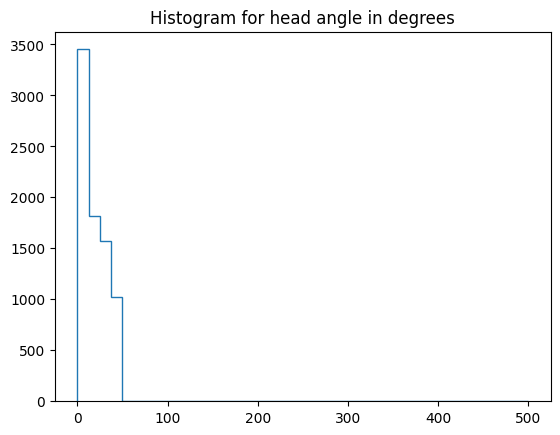

-25.0
45.0
0.0
92.0


In [11]:
counts, bins = np.histogram(head_angle,bins=40,range=(0,500))
plt.stairs(counts, bins)
plt.title("Histogram for head angle in degrees")
plt.show()
print(min(head_angle))
print(max(head_angle))
print(min(arm_height))
print(max(arm_height))

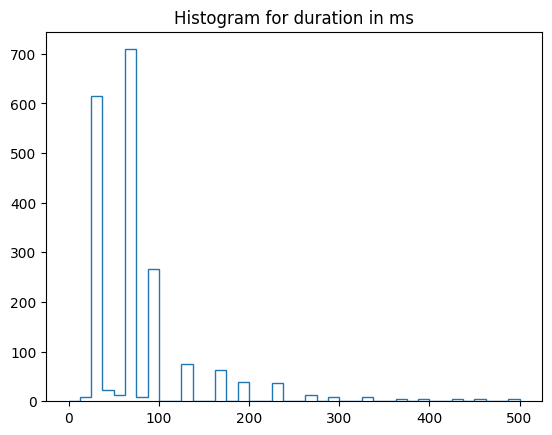

In [176]:
counts, bins = np.histogram(duration,bins=40,range=(0,500))
plt.stairs(counts, bins)
plt.title("Histogram for duration in ms")
plt.show()

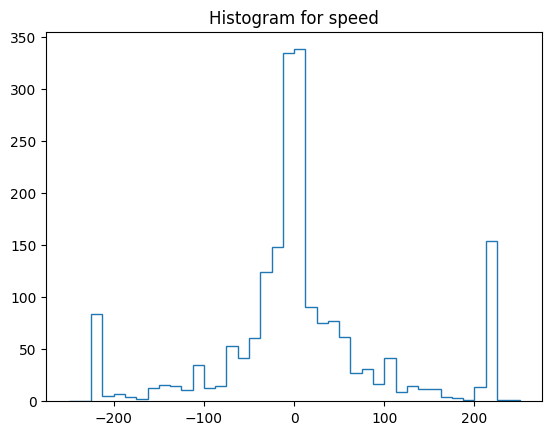

In [175]:
counts, bins = np.histogram(speed,bins=40,range=(-250,250))
plt.stairs(counts, bins)
plt.title("Histogram for speed")
plt.show()

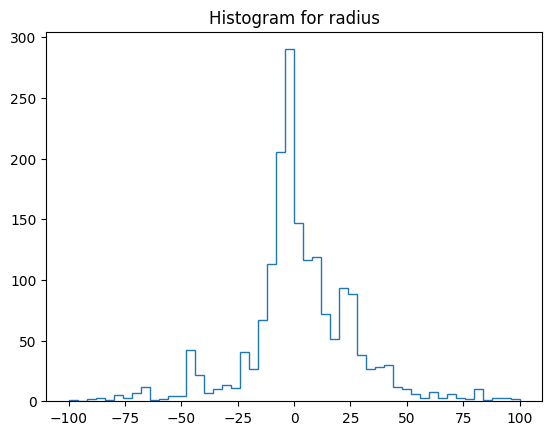

In [174]:
counts, bins = np.histogram(radius,bins=50, range=(-100,100))
plt.stairs(counts, bins)
plt.title("Histogram for radius")
plt.show()

In [213]:
data_df[data_df['file_name']=='anim_energy_eat_lvl1_03']

file_name   embed_code  video_title  \
529  anim_energy_eat_lvl1_03  fAT6CtGg2gE          532   

                                           description  interest  alarm  \
529  he seemed really pissed angered and disguisted...         0      0   

     confusion  understanding  frustration  relief  ...  boredom  surprise  \
529          0              0            0       0  ...        0         0   

     disgust  desire                                   left_wheel_speed  \
529        1       0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                     right_wheel_speed  \
529  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               pose_12  \
529  [-78.17523956298828, -78.17523956298828, -78.1...   

                                               pose_13  \
529  [-2.462611198425293, -2.462611198425293, -2.46...   

                                  lift_position_height    label  
529  [31.412086486816406, 31.412086486816406, 31.41...  disgust  

[1 rows x 26 columns]

In [214]:
name='anim_energy_eat_lvl1_03'
lwsp=data_df[data_df['file_name']==name]['left_wheel_speed'].tolist()[0]
rwsp=data_df[data_df['file_name']==name]['right_wheel_speed'].tolist()[0]
p12=data_df[data_df['file_name']==name]['pose_12'].tolist()[0]
p13=data_df[data_df['file_name']==name]['pose_13'].tolist()[0]


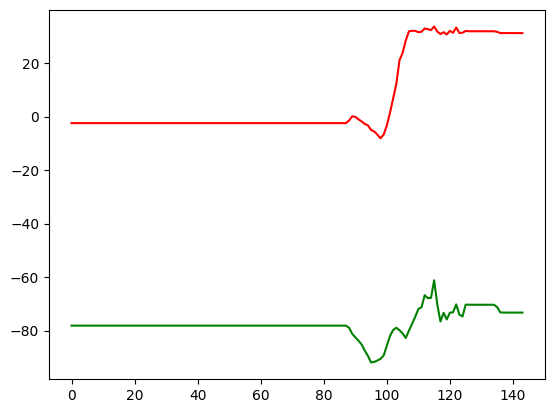

In [215]:
plt.plot(p12, 'g', p13, 'r')
plt.show()

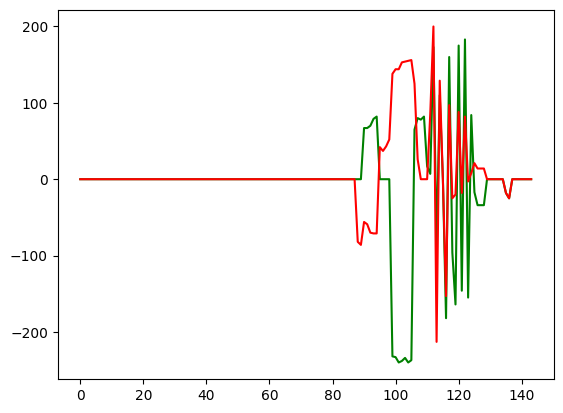

In [216]:
plt.plot(lwsp, 'g', rwsp, 'r')
plt.show()

In [217]:
files = os.listdir('data/params_with_face/')
radius=[]
speed=[]
timems=[]
for file in files:
    obj = open("data/params_with_face/"+file, 'rb')
    data = json.load(obj)
    # Iterate through sub animations
    for sub_anim in data['clips']:
        sub_anim_name = sub_anim['Name']
        if 'anim_energy_eat_lvl1_03' == sub_anim_name:
            for subanim in sub_anim['keyframes']['BodyMotionKeyFrame']:
                print(subanim)
                radius.append(subanim['radius_mm'])
                speed.append(subanim['speed'])
    obj.close()
rd=set(radius)
sp=set(speed)

{'triggerTime_ms': 4752, 'durationTime_ms': 99, 'radius_mm': '23.0', 'speed': -59}
{'triggerTime_ms': 4851, 'durationTime_ms': 330, 'radius_mm': '-2.0', 'speed': 8}
{'triggerTime_ms': 5181, 'durationTime_ms': 198, 'radius_mm': '23.0', 'speed': 46}
{'triggerTime_ms': 5379, 'durationTime_ms': 462, 'radius_mm': '-13.0', 'speed': -220}
{'triggerTime_ms': 5841, 'durationTime_ms': 231, 'radius_mm': '-23.0', 'speed': 46}
{'triggerTime_ms': 6171, 'durationTime_ms': 66, 'radius_mm': '308.0', 'speed': 220}
{'triggerTime_ms': 6237, 'durationTime_ms': 66, 'radius_mm': '59.0', 'speed': -220}
{'triggerTime_ms': 6303, 'durationTime_ms': 66, 'radius_mm': '199.0', 'speed': 220}
{'triggerTime_ms': 6369, 'durationTime_ms': 66, 'radius_mm': '-564.0', 'speed': -220}
{'triggerTime_ms': 6435, 'durationTime_ms': 66, 'radius_mm': '-59.0', 'speed': -148}
{'triggerTime_ms': 6501, 'durationTime_ms': 66, 'radius_mm': '-111.0', 'speed': 171}
{'triggerTime_ms': 6567, 'durationTime_ms': 66, 'radius_mm': '-48.0', 'spe

In [211]:
files = os.listdir('data/params_with_face/')
results=[]
filter_str=['TURN_IN_PLACE','STRAIGHT']
for file in files:
    obj = open("data/params_with_face/"+file, 'rb')
    data = json.load(obj)
    # Iterate through sub animations
    for sub_anim in data['clips']:
        sub_anim_name = sub_anim['Name']
        #if 'angry' in sub_anim_name:
        #    print(sub_anim_name)
        #print(len(sub_anim['keyframes']['BodyMotionKeyFrame']))
        straight=0
        numeric=0
        turn=0
        for subanim in sub_anim['keyframes']['BodyMotionKeyFrame']:
            if subanim['radius_mm'] == 'TURN_IN_PLACE':
                turn=turn+1
            elif subanim['radius_mm'] == 'STRAIGHT':
                straight=straight+1
            else:
                numeric=numeric+1
        results.append((sub_anim_name, numeric, straight, turn))
    obj.close()

In [212]:
results

[('anim_repair_mild_fix_lift_01', 10, 4, 0),
 ('anim_repair_mild_fix_lift_02', 11, 0, 0),
 ('anim_energy_drivegetin_01', 0, 0, 0),
 ('anim_energy_driveloop_01', 0, 0, 0),
 ('anim_energy_drivegeout_01', 0, 3, 0),
 ('anim_energy_driveloop_02', 0, 0, 0),
 ('anim_energy_driveloop_03', 0, 0, 0),
 ('anim_workout_mediumenergy_getout_01', 0, 9, 1),
 ('anim_memorymatch_reacttopattern_01', 0, 0, 0),
 ('anim_memorymatch_reacttopattern_02', 0, 0, 0),
 ('anim_cozmosays_badword_01', 0, 4, 16),
 ('anim_cozmosays_badword_02', 9, 1, 0),
 ('anim_cozmosays_badword_01_head_angle_-20', 0, 4, 16),
 ('anim_cozmosays_badword_01_head_angle_20', 0, 4, 16),
 ('anim_cozmosays_badword_01_head_angle_40', 0, 4, 16),
 ('anim_cozmosays_badword_02_head_angle_-20', 9, 1, 0),
 ('anim_cozmosays_badword_02_head_angle_20', 9, 1, 0),
 ('anim_cozmosays_badword_02_head_angle_40', 9, 1, 0),
 ('anim_petdetection_shortreaction_01', 0, 6, 0),
 ('anim_petdetection_shortreaction_02', 0, 5, 0),
 ('anim_petdetection_shortreaction_01_h